In [38]:
!pip install pandas

In [ ]:
import pandas as pd #olah data
import matplotlib.pyplot as plt #untuk grafik dan plot, bisa digunakan sendiri
import seaborn as sns #untuk visualisasi data, membutuhkan matplotlib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split #membagi dataset ke dalam data training dan data testing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/febbisena/DataMining/main/milkgrading.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
df.shape

(1059, 8)

In [ ]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
en = LabelEncoder()

df['Grade'] = en.fit_transform(df['Grade'])
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [ ]:
label_mapping = pd.Series(en.classes_)
label_mapping

0      high
1       low
2    medium
dtype: object

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x

array([[  6.6,  35. ,   1. , ...,   1. ,   0. , 254. ],
       [  6.6,  36. ,   0. , ...,   0. ,   1. , 253. ],
       [  8.5,  70. ,   1. , ...,   1. ,   1. , 246. ],
       ...,
       [  3. ,  40. ,   1. , ...,   1. ,   1. , 255. ],
       [  6.8,  43. ,   1. , ...,   1. ,   0. , 250. ],
       [  8.6,  55. ,   0. , ...,   1. ,   1. , 255. ]])

In [ ]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.25, random_state=50)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  794
x_test =  265
y_train =  794
y_test =  265


In [24]:
test_df = pd.DataFrame(x_test, columns=df.columns[:-1])
test_df['Actual'] = y_test

In [25]:
test_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Actual
0,8.1,66.0,1.0,0.0,1.0,1.0,255.0,1
1,6.8,45.0,0.0,1.0,0.0,0.0,240.0,2
2,6.5,37.0,0.0,0.0,0.0,0.0,255.0,2
3,9.5,34.0,1.0,1.0,0.0,1.0,255.0,1
4,6.7,45.0,1.0,1.0,0.0,0.0,247.0,2
...,...,...,...,...,...,...,...,...
260,9.0,43.0,1.0,0.0,1.0,1.0,250.0,1
261,6.8,36.0,0.0,1.0,1.0,0.0,253.0,0
262,6.6,43.0,0.0,0.0,1.0,0.0,250.0,2
263,6.6,38.0,0.0,0.0,0.0,0.0,255.0,2


In [26]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 0.15775221, -0.62195486, -1.09797794, ..., -1.38920456,
        -0.97758121,  0.71586006],
       [ 0.15775221, -0.1511004 ,  0.91076511, ...,  0.7198364 ,
        -0.97758121, -0.44649758],
       [ 0.15775221, -0.33944218, -1.09797794, ...,  0.7198364 ,
        -0.97758121,  0.71586006],
       ...,
       [ 1.72344289, -0.1511004 ,  0.91076511, ...,  0.7198364 ,
         1.02293292, -0.44649758],
       [-0.05575107, -0.90446754,  0.91076511, ...,  0.7198364 ,
        -0.97758121, -1.3763837 ],
       [ 0.08658445, -0.62195486,  0.91076511, ...,  0.7198364 ,
        -0.97758121,  0.71586006]])

In [28]:
x_test

array([[ 1.08293307,  2.01483012,  0.91076511, ...,  0.7198364 ,
         1.02293292,  0.71586006],
       [ 0.15775221,  0.03724139, -1.09797794, ..., -1.38920456,
        -0.97758121, -2.77121288],
       [-0.05575107, -0.71612575, -1.09797794, ..., -1.38920456,
        -0.97758121,  0.71586006],
       ...,
       [ 0.01541669, -0.1511004 , -1.09797794, ...,  0.7198364 ,
        -0.97758121, -0.44649758],
       [ 0.01541669, -0.62195486, -1.09797794, ..., -1.38920456,
        -0.97758121,  0.71586006],
       [ 0.15775221, -0.43361308,  0.91076511, ...,  0.7198364 ,
         1.02293292,  0.71586006]])

In [29]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [31]:
y_pred = nb.predict(x_test)

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 65   0   0]
 [  3 100   5]
 [  7   0  85]]


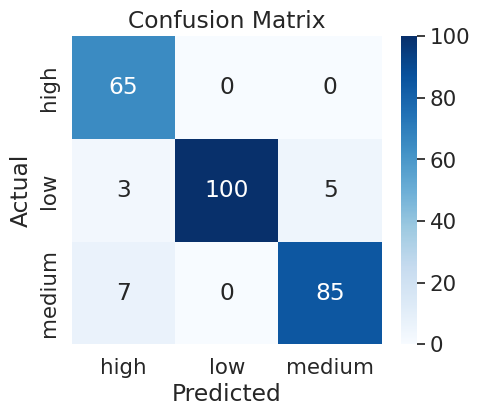

In [33]:
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues', xticklabels=en.classes_, yticklabels=en.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
creport = classification_report(y_test, y_pred)
print(creport)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       108
           2       0.94      0.92      0.93        92

    accuracy                           0.94       265
   macro avg       0.94      0.95      0.94       265
weighted avg       0.95      0.94      0.94       265



In [36]:
akurasi = accuracy_score(y_test, y_pred)
print('Tingkat Akurasi : %d Persen'%(akurasi*100))

Tingkat Akurasi : 94 Persen


In [41]:
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

In [42]:
actual_counts

0     65
1    108
2     92
Name: count, dtype: int64

In [44]:
predicted_counts

0     75
1    100
2     90
Name: count, dtype: int64

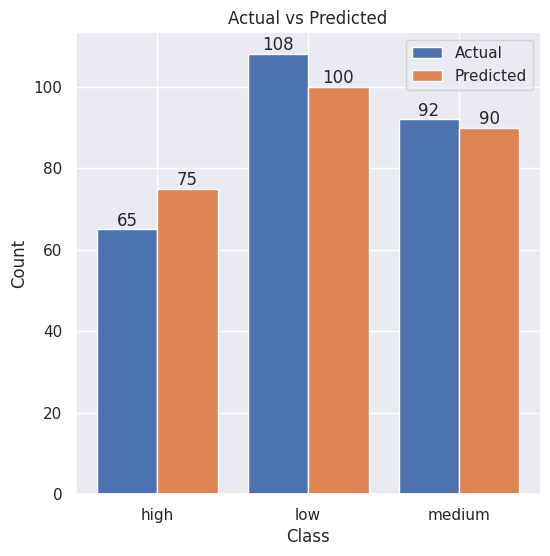

In [45]:
plt.figure(figsize=(6, 6))

sns.set(font_scale=1)
width = 0.4
classes = range(len(en.classes_))

bars1 = plt.bar(classes, actual_counts, width, label='Actual')
bars2 = plt.bar([p + width for p in classes], predicted_counts, width, label='Predicted')

plt.bar_label(bars1, fmt='%d')
plt.bar_label(bars2, fmt='%d')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted')
plt.xticks([p + width/2 for p in classes], en.inverse_transform(classes))
plt.legend()

plt.show()

In [46]:
test_df['Predicted'] = y_pred
test_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Actual,Predicted
0,8.1,66.0,1.0,0.0,1.0,1.0,255.0,1,1
1,6.8,45.0,0.0,1.0,0.0,0.0,240.0,2,2
2,6.5,37.0,0.0,0.0,0.0,0.0,255.0,2,2
3,9.5,34.0,1.0,1.0,0.0,1.0,255.0,1,1
4,6.7,45.0,1.0,1.0,0.0,0.0,247.0,2,2
...,...,...,...,...,...,...,...,...,...
260,9.0,43.0,1.0,0.0,1.0,1.0,250.0,1,1
261,6.8,36.0,0.0,1.0,1.0,0.0,253.0,0,0
262,6.6,43.0,0.0,0.0,1.0,0.0,250.0,2,2
263,6.6,38.0,0.0,0.0,0.0,0.0,255.0,2,2
